# Analyzing my chats

## 0. Some setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import chat_utils_soln as chat_utils # uncomment this line to use the solution instead of your code
# import chat_utils 
import matplotlib.pyplot as plt
from datetime import datetime

## 1a) How often do I talk to my friends?

In [2]:
friend_time_counts = chat_utils.get_counts_per_person()

Divesh Patel


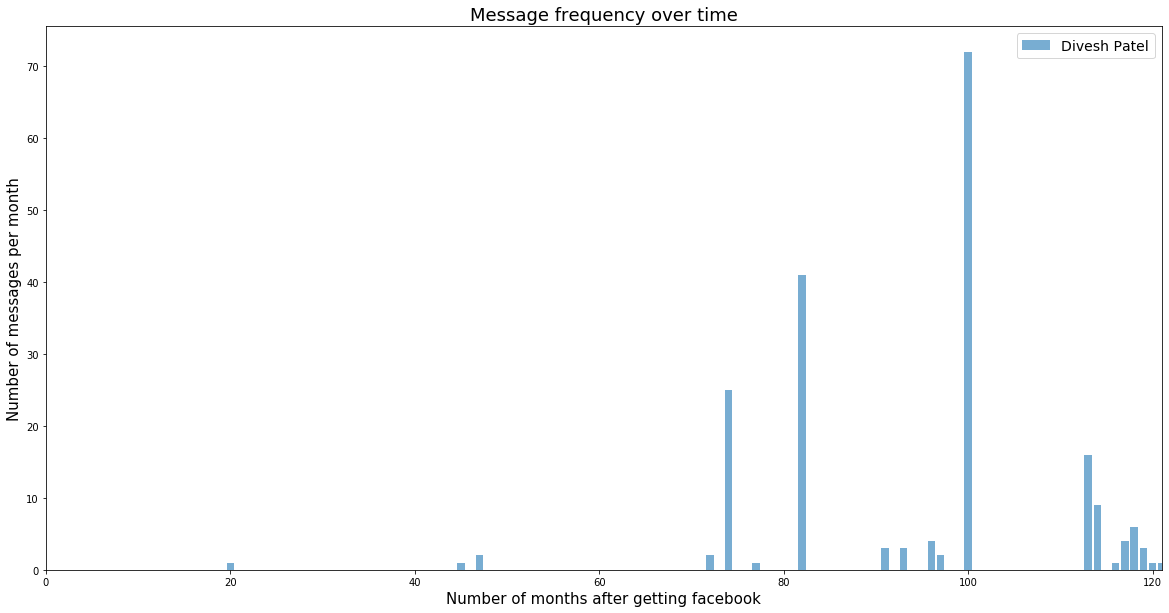

In [11]:
def plot_friend_timeline(names):
    """
    Given a list of friend's names, plot how frequently
    each friend was messaged each month. 
    """
    
    # make a big figure, and set the x axis' bounds to be  
    # between when you made your account and now
    plt.figure(figsize=(20, 10))
    num_months = chat_utils.get_last_chat_month()
    plt.xlim((0, num_months))
    
    for name in names:
        name = name.strip()
        if name not in friend_time_counts:
            # the funky syntax on the next line creates what's called an 'f-string',
            # which is a way of quickly and elegantly injecting variables into 
            # strings. Check out this page for more details:
            # https://realpython.com/python-f-strings/
            print(f"'{name}' is not in the data!") 
            continue # skip past the name
        
        # first, get the dictionary from month to how many 
        # times I messaged that friend in that month
        friend_counts = friend_time_counts[name]
        
        # sort the months in chronological order
        x = sorted(friend_counts.keys())
        
        # get the chat frequencies in chronological order
        y = [friend_counts[month] for month in x]
        
        # draw a bar graph
        plt.bar(x, y, label=name, alpha=0.6)

    # add a legend and labels for your convenience and 
    # viewing pleasure
    plt.legend(prop={'size': 14})
    plt.xlabel("Number of months after getting facebook", fontsize=15)
    plt.ylabel("Number of messages per month", fontsize=15)
    plt.title("Message frequency over time", fontsize=18)
    plt.show()

# get a list of names for the user, and plot it
names = input().split(",")   # the input() function allows the user to type text and returns it as a string
plot_friend_timeline(names)

## 1b) ...and how much do we say to each other?

In [6]:
# make a dictionary that will map from friends to 
# number of messages sent or received
friends_to_num_messages = {}

for friend, counts in friend_time_counts.items():
    friends_to_num_messages[friend] = sum(counts.values()) # counts.values() returns a collection of all the values
                                                           # and the sum function adds all these values together

# we want to sort the items in the dictionary by their values (hence the lambda)
# and in descending order (hence reverse=True)
top_friends = sorted(friends_to_num_messages.items(), key=lambda pair : pair[1], reverse=True)

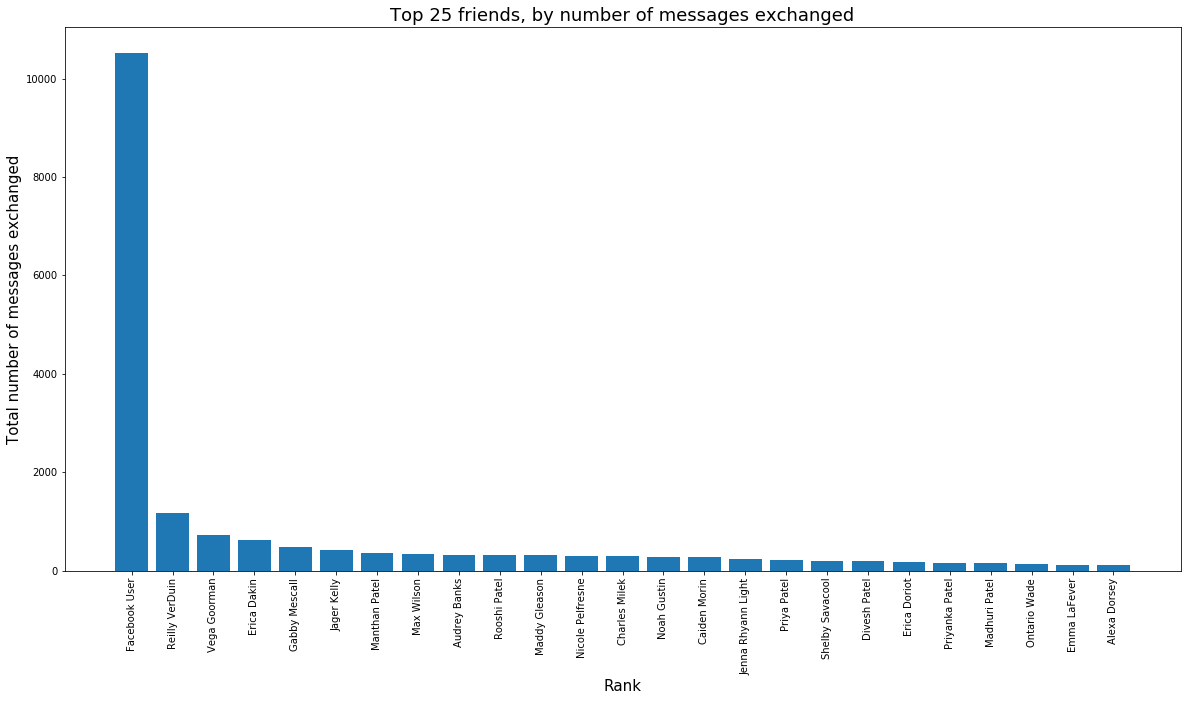

In [7]:
def plot_top_friends(num_friends):
    """
    Finds the top {num_friends} friends, based on 
    how many messages I've sent them & plots them.
    """
    plt.figure(figsize=(20, 10))
    
    # get as many friends as we want to plot
    data = top_friends[:num_friends]
    
    message_nums = [pair[1] for pair in data]
    
    # get their name
    labels = [cnt[0] for cnt in data]
    
    # plot their ranks against their number of messages
    plt.bar(list(range(num_friends)), message_nums, tick_label=labels)
    
    # axes and titles, for your viewing pleasure
    plt.xticks(rotation=90)
    plt.xlabel("Rank", fontsize=15)
    plt.ylabel("Total number of messages exchanged", fontsize=15)
    plt.title(f"Top {num_friends} friends, by number of messages exchanged", fontsize=18)
    plt.show()
    
plot_top_friends(25)

## 2) What did I say in my messages?

In [8]:
word_counts_over_time = chat_utils.get_chat_word_counts()

hi


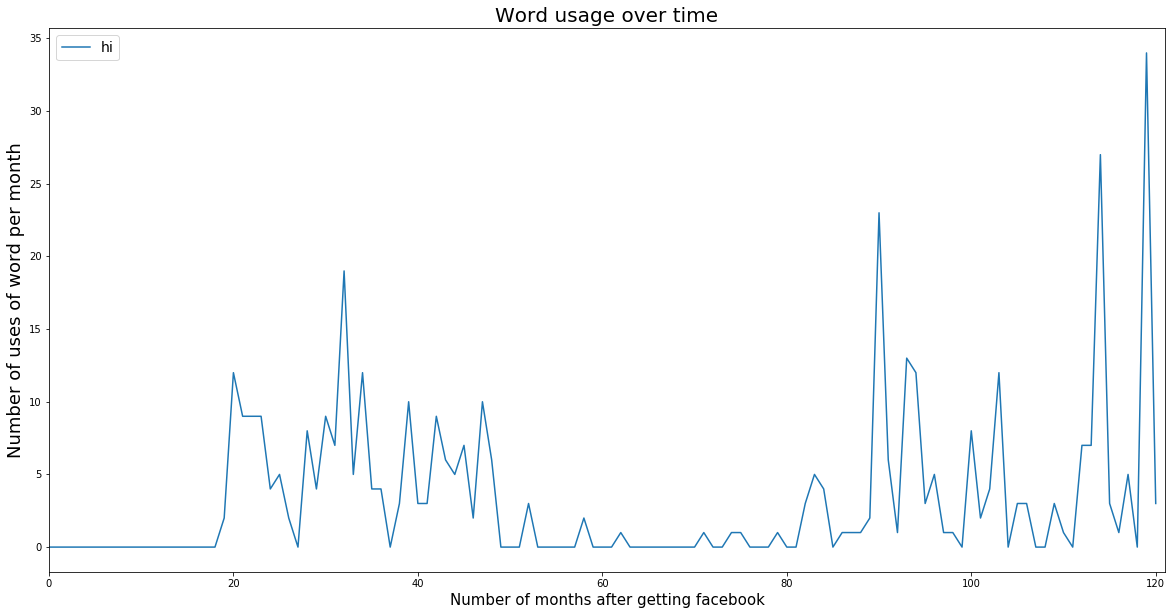

In [12]:
def plot_word_usage_over_time(words):
    
    # make a big figure, and set the x axis' bounds to be  
    # between when you made your account and now
    plt.figure(figsize=(20, 10))
    num_months = chat_utils.get_last_chat_month()
    plt.xlim((0, num_months))
    
    for word in words:
        word = word.lower() # all our data is lowercase, so do the same with what the user typed
        if word not in word_counts_over_time:
            print(f"'{word}' is not in the data!") # string formatting!
            continue
        
        # get the frequency dictionary for that word
        word_counts = word_counts_over_time[word]
        
        # get the month indices
        months = list(range(num_months))
        # get how many times I used the word per month.
        # the .get() function in a dictionary retrieves the 
        # value associated with a particular function as
        # per normal, but allows us to provide an optional
        # second default value to get back if the key
        # isn't present in the dictionary. In this case,
        # I'm using 0 because if it's not in the dictionary,
        # I used it 0 times that month. 
        counts = [word_counts.get(m, 0) for m in months]
        plt.plot(months, counts, label=word)

    # legend and labels, for your viewing pleasure
    plt.legend(prop={'size': 14})
    plt.title("Word usage over time", fontsize=20)
    plt.xlabel("Number of months after getting facebook", fontsize=15)
    plt.ylabel("Number of uses of word per month", fontsize=18)
    plt.show()

words = input().split()
plot_word_usage_over_time(words)